In [1]:
import pandas as pd
from pykml.factory import KML_ElementMaker as KML
from lxml import etree
import shapefile as shp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_name = 'relatorio_843.csv'

In [3]:
df = pd.read_csv(filepath_or_buffer=file_name, sep=';', encoding= 'unicode_escape')

In [4]:
filtro_intervencao = df['Tipo de Intervenção'] == 'Cadastro apenas da barragem'
filtro_status1 = df['Status'] != 'Concluído'
filtro_status2 = df['Status'] != 'Desativado'
filtro_status3 = df['Status'] != 'Em andamento'

In [5]:
df_filtrado = df[filtro_status1 & filtro_status2 & filtro_status3 & filtro_intervencao]

In [6]:
df_filtrado.shape

(87, 25)

In [7]:
df_filtrado.head()

,Número do cadastro,Número da portaria,Nome do usuário de água,Natureza da intervenção,Tipo da Fonte de Captação,Tipo de Intervenção,Classificação,Status,Observação,Data de início do cadastro,...,Finalidades de Uso,Bacia Hidrográfica,Corpo Hídrico,Sistema Aquífero,Município,Nome da Geometria,Latitude,Longitude,Latitude (ponto final),Longitude (ponto final)
4,2020/002.866,-,LINHA ONZE OESTE ENERGIA LTDA,Água Superficial,Barragem de nível,Cadastro apenas da barragem,Cadastro,Aguardando formalização de documentos,-,19/02/2020,...,Aproveitamento hidrelétrico,Bacia Hidrográfica do Rio Ijuí,Rio Ijuí,-,Coronel Barros,Ponto 1,"-54,0045500199785","-28,3511124417778",-,-
5,2020/002.683,-,Cooperativa de Geração de Energia e Desenvolvi...,Água Superficial,Barragem de nível,Cadastro apenas da barragem,Cadastro,Aguardando formalização de documentos,-,17/02/2020,...,Aproveitamento hidrelétrico,Bacia Hidrográfica dos Rios Turvo - Santa Rosa...,Rio Buricá,-,Chiapetta,Ponto 1,"-53,9701307613505","-27,9612491935233",-,-
9,2020/001.754,-,BORTOLON AGROCOMERCIAL EIRELI,Água Superficial,Barragem de acumulação,Cadastro apenas da barragem,Cadastro,Aguardando análise,-,31/01/2020,...,Aproveitamento hidrelétrico,Bacia Hidrográfica dos Rios Apuaê - Inhandava,Rio Socorro,-,Vacaria,Ponto 1,"-50,8559701377817","-28,2990821433521",-,-
10,2020/001.523,-,ENERBIO SERVICOS DE ENGENHARIA LTDA,Água Superficial,Barragem de nível,Cadastro apenas da barragem,Cadastro,Aguardando análise,-,28/01/2020,...,Aproveitamento hidrelétrico,Bacia Hidrográfica do Rio da Várzea,Rio Fortaleza,-,Erval Seco,Ponto 1,"-53,5472","-27,4186",-,-
19,2020/000.536,-,USINA HIDRELETRICA SUZANA I LTDA,Água Superficial,Barragem de nível,Cadastro apenas da barragem,Cadastro,Aguardando análise,-,13/01/2020,...,Aproveitamento hidrelétrico,Bacia Hidrográfica dos Rios Apuaê - Inhandava,Rio Suzana,-,Gaurama,Centro barramento,"-52,082783435041","-27,5152597908802",-,-


In [8]:
shp_path = "estados_2010.shp"
sf = shp.Reader(shp_path)

In [29]:
sf.records()[22]

Record #22: [23, 'Rio Grande do Sul', 'RS', '1', '43']

In [63]:
def plot_shape(idt, ax):
    shape_ex = sf.shape(idt)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    ax.plot(x_lon,y_lat,c='gray') 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)

In [64]:
pie_dict = {}
for s in df_filtrado['Status'].unique():
    ns = sum(df_filtrado['Status'] == s)
    pie_dict[s] = ns

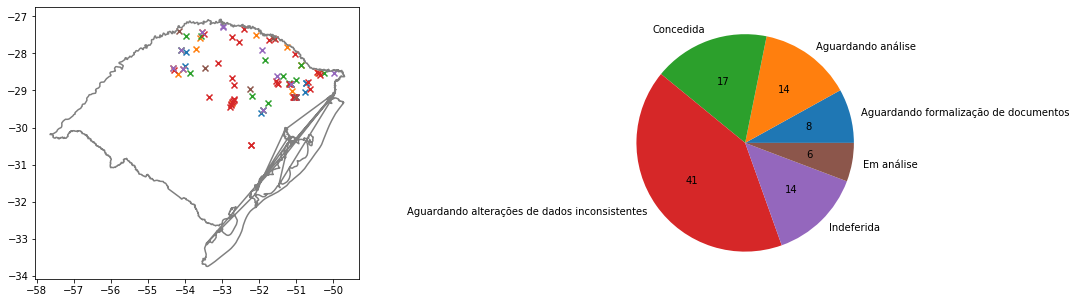

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,5))
ax2.pie(pie_dict.values(), autopct='%1.0f', labels=pie_dict.keys())
plot_shape(22, ax1)
for s in df_filtrado['Status'].unique():
    f = df_filtrado['Status'] == s
    x, y = df_filtrado[f]['Latitude'].values, df_filtrado[f]['Longitude'].values
    x, y = [float(i.replace(',','.')) for i in x], [float(i.replace(',','.')) for i in y]
    ax1.scatter(x, y, label = s, marker='x')
ax1.axis('scaled')
#fig.suptitle('Status dos processos de hidrelétricas do SIOUT')
#ax2.legend(loc='upper right')
plt.savefig('Status')

In [14]:
doc = KML.Document()

In [15]:
icons = {
    'verde':'http://maps.google.com/mapfiles/kml/pushpin/grn-pushpin.png',
    'amarelo':'http://maps.google.com/mapfiles/kml/pushpin/ylw-pushpin.png',
    'vermelho':'http://maps.google.com/mapfiles/kml/pushpin/red-pushpin.png'
}

In [16]:
for color in icons:
    
    s = KML.Style(
            KML.IconStyle(
                KML.scale(1.2),
                KML.Icon(
                    KML.href(icons[color])
                ),
            ),
            id=color,
        )
    
    doc.append(s)

In [17]:
fld_ag_doc = KML.Folder(KML.name('Aguardando formalização de documentos'))
fld_ag_an = KML.Folder(KML.name('Aguardando análise'))
fld_ag_alt = KML.Folder(KML.name('Aguardando alterações de dados inconsistentes'))
fld_an = KML.Folder(KML.name('Em análise'))
fld_conc = KML.Folder(KML.name('Concedida'))
fld_ind = KML.Folder(KML.name('Indeferida'))

In [18]:
for index, row in df_filtrado.iterrows():
    name = row['Número do cadastro']
    usuario = row['Nome do usuário de água']
    status = row['Status']
    corpo_hidrico = row['Corpo Hídrico']
    municipio = row['Município']
    description = '''
Usuario: {}
Status: {}
Municipio: {}
Corpo Hidrico: {}
    '''.format(usuario, status, municipio, corpo_hidrico)
    lat = row['Latitude'].replace(',','.')
    long = row['Longitude'].replace(',','.')
    coordinates = lat+','+long
    
    if status == 'Concedida':
        style = '#verde'
    elif status == 'Indeferida':
        style = '#vermelho'
    else:
        style = '#amarelo'
    
    p = KML.Placemark(
        KML.name(name),
        KML.Point(KML.coordinates(coordinates)),
        KML.description(description),
        KML.styleUrl(style))
    
    if status == 'Aguardando formalização de documentos':
        fld_ag_doc.append(p)
    elif status == 'Aguardando análise':
        fld_ag_an.append(p)
    elif status == 'Aguardando alterações de dados inconsistentes':
        fld_ag_alt.append(p)
    elif status == 'Em análise':
        fld_an.append(p)
    elif status == 'Concedida':
        fld_conc.append(p)
    elif status == 'Indeferida':
        fld_ind.append(p)

In [19]:
doc.append(fld_ag_doc)
doc.append(fld_ag_an)
doc.append(fld_ag_alt)
doc.append(fld_an)
doc.append(fld_conc)
doc.append(fld_ind)

In [20]:
kml_file_path = 'hidreletricas_SIOUT.kml'

In [21]:
kml_str = etree.tostring(doc, pretty_print=True).decode('utf-8')

In [22]:
f = open(kml_file_path, "w")
f.write(kml_str)
f.close()